# NetworkX

This Jupyter Notebook is a walkthrough through the most important functions and features of [networkx](https://networkx.org/documentation/stable/index.html) for this lecture. Networkx is a library to model and manipulate graphs, execute algorithms (e.g. for shortest paths) or visualize graphs.
Make sure to check the documentation for any function you wish to apply on a graph or how to build/label graphs after this tutorial.

First of all, the module needs to be imported, commonly as `nx`:

In [2]:
import networkx as nx

## Undirected Graphs

Undirected graphs have edges which are, as the name suggests, undirected.

First, we build a graph and add nodes:

In [3]:
# create a new undirected graph
G = nx.Graph()
# there are several ways to add nodes:
# add a single node
G.add_node("s")
G.add_node("t")

G.nodes

NodeView(('s', 't'))

In [4]:
# we can add multiple nodes, too
G.add_nodes_from([1,2,3,4,5,6,7,8])
new_nodes = list(range(8, 30))
G.add_nodes_from(new_nodes)

G.nodes

NodeView(('s', 't', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

Note that we can add nodes with different types of names. Here we used `str` and `int`. These are the identifiers or indices. You will see later how to add attributes to nodes and edges.

Now, we want to add edges.
First of all, we add single edges:

In [5]:
G.add_edge("s", 1)
G.add_edge("t", 30)

If we want to connect `"s"` to all nodes with an uneven index and and `"t"` to all nodes with even index, we could do it like this:

In [6]:
uneven_edges = [("s", i) for i in range(1, 30, 2)]
even_edges = [(2 * i, "t") for i in range(1, 15)]

G.add_edges_from(uneven_edges)
G.edges

EdgeView([('s', 1), ('s', 3), ('s', 5), ('s', 7), ('s', 9), ('s', 11), ('s', 13), ('s', 15), ('s', 17), ('s', 19), ('s', 21), ('s', 23), ('s', 25), ('s', 27), ('s', 29), ('t', 30)])

In [7]:
G.add_edges_from(even_edges)
print(list(G.edges))

[('s', 1), ('s', 3), ('s', 5), ('s', 7), ('s', 9), ('s', 11), ('s', 13), ('s', 15), ('s', 17), ('s', 19), ('s', 21), ('s', 23), ('s', 25), ('s', 27), ('s', 29), ('t', 30), ('t', 2), ('t', 4), ('t', 6), ('t', 8), ('t', 10), ('t', 12), ('t', 14), ('t', 16), ('t', 18), ('t', 20), ('t', 22), ('t', 24), ('t', 26), ('t', 28)]


For every existing graph, we can query attributes, that might be useful for our problem.
With `G.nodes`, we get the nodes, with `G.edges` we get all the edges.
We can query the adjacent nodes of any node with `G.adj[node]` or the node degree of any node with `G.degree[node]`.

In [8]:
print("The nodes adjacent to 's' are:", list(G.adj["s"]))
print("The degree of node 't' is:", G.degree["s"])
print("The degree of node 5 is:", G.degree[5])

The nodes adjacent to 's' are: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
The degree of node 't' is: 15
The degree of node 5 is: 1


Lets's connect all nodes with an uneven index to their even successor and check again:

In [9]:
connections = [(i, i+1) for i in range(1, 30, 2)]

G.add_edges_from(connections)

In [10]:
print("The nodes adjacent to 's' are:", list(G.adj["s"]))
print("The degree of node 't' is:", G.degree["s"])
print("The degree of node 5 is:", G.degree[5])

The nodes adjacent to 's' are: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
The degree of node 't' is: 15
The degree of node 5 is: 2


## Directed Graphs

We can create an [directed graph](https://networkx.org/documentation/stable/reference/classes/digraph.html) and repeat all the functions we aready know:

In [11]:
# create a new, undirected graph
D = nx.DiGraph()
# there are several ways to add nodes:
# add a single node
D.add_node("s")
D.add_node("t")
# we can add multiple nodes, too
new_nodes = list(range(1, 30))
D.add_nodes_from(new_nodes)
# we add the edges from before
uneven_edges = [("s", i) for i in range(1, 30, 2)]
even_edges = [(2 * i, "t") for i in range(1, 16)]
connections = [(i, i+1) for i in range(1, 30, 2)]

D.add_edges_from(uneven_edges)
D.add_edges_from(even_edges)
D.add_edges_from(connections)

print(D.edges)

[('s', 1), ('s', 3), ('s', 5), ('s', 7), ('s', 9), ('s', 11), ('s', 13), ('s', 15), ('s', 17), ('s', 19), ('s', 21), ('s', 23), ('s', 25), ('s', 27), ('s', 29), (1, 2), (2, 't'), (3, 4), (4, 't'), (5, 6), (6, 't'), (7, 8), (8, 't'), (9, 10), (10, 't'), (11, 12), (12, 't'), (13, 14), (14, 't'), (15, 16), (16, 't'), (17, 18), (18, 't'), (19, 20), (20, 't'), (21, 22), (22, 't'), (23, 24), (24, 't'), (25, 26), (26, 't'), (27, 28), (28, 't'), (29, 30), (30, 't')]


Notice that the order in the tuples changed from `("t", i)` to `(i, "t")`. This is because the direction of the edges matters in a directed graph.

Our representation of the graphs are nice, but let's have a look at the visualization. Visualizing graphs with networkx is quite easy, but we need an additional library, named [matplotlib](https://matplotlib.org/3.5.0/index.html).

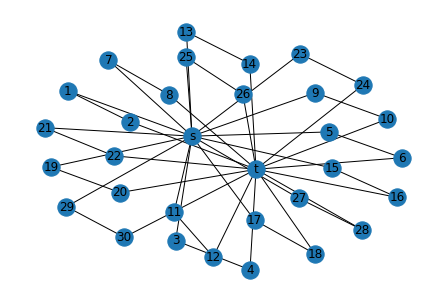

In [12]:
import matplotlib.pyplot as plt

# First of all, we draw the undirected graph
# The "with_labels" argument in the draw method shows the indices of the nodes.
nx.draw(G, with_labels=True)

Hm, okay, looks like a graph, but the intuition that we got earlier might look a bit different. How does the directed graph look?

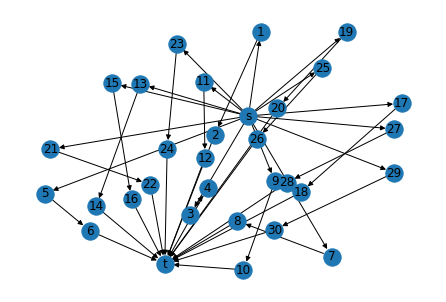

In [13]:
nx.draw(D, with_labels=True)

... even worse.
But, we will fix that later.

Now, we want to add attributes to our graph. In graph based optimization problems, we are often interested in attributes for edges or nodes. In the following, we will do this for both, our undirected and our directed graph.

In [14]:
# We add a supply to s and a demand to t
G.nodes["s"]["supply"] = 15
G.nodes["t"]["demand"] = 15

D.nodes["s"]["supply"] = 15
D.nodes["t"]["demand"] = 15

# We can now access these attributes for each node or for all nodes
print(G.nodes["s"])
D.nodes.data()

{'supply': 15}


NodeDataView({'s': {'supply': 15}, 't': {'demand': 15}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}})

For a single node, we obtain the dictionary with all attributes, for all nodes, we get a `NodeDataView` object, which is a ditionary of all nodes with the according attributes. For the nodes with integer indices, we obtain empty dictionaries, because we have not added any attributes yet.

We can do the same for the edges:

In [15]:
# We can use set_edge_attributes to add a whole dictionary of attributes
# For example, we add a capacity value to each edge.
capacities = {}
for (u, v) in G.edges:
    capacities[(u, v)] = 1

nx.set_edge_attributes(G, capacities, "capacity")

# We can also add an edge from t to s and add the capacity to it while creating the edge:
G.add_edge("t", "s", capacity=15)
# here, we can use the name of the attribute directly as attribute to the add_edge method

G.edges.data()

EdgeDataView([('s', 1, {'capacity': 1}), ('s', 3, {'capacity': 1}), ('s', 5, {'capacity': 1}), ('s', 7, {'capacity': 1}), ('s', 9, {'capacity': 1}), ('s', 11, {'capacity': 1}), ('s', 13, {'capacity': 1}), ('s', 15, {'capacity': 1}), ('s', 17, {'capacity': 1}), ('s', 19, {'capacity': 1}), ('s', 21, {'capacity': 1}), ('s', 23, {'capacity': 1}), ('s', 25, {'capacity': 1}), ('s', 27, {'capacity': 1}), ('s', 29, {'capacity': 1}), ('s', 't', {'capacity': 15}), ('t', 30, {'capacity': 1}), ('t', 2, {'capacity': 1}), ('t', 4, {'capacity': 1}), ('t', 6, {'capacity': 1}), ('t', 8, {'capacity': 1}), ('t', 10, {'capacity': 1}), ('t', 12, {'capacity': 1}), ('t', 14, {'capacity': 1}), ('t', 16, {'capacity': 1}), ('t', 18, {'capacity': 1}), ('t', 20, {'capacity': 1}), ('t', 22, {'capacity': 1}), ('t', 24, {'capacity': 1}), ('t', 26, {'capacity': 1}), ('t', 28, {'capacity': 1}), (1, 2, {'capacity': 1}), (3, 4, {'capacity': 1}), (5, 6, {'capacity': 1}), (7, 8, {'capacity': 1}), (9, 10, {'capacity': 1}),

In [16]:
nx.set_edge_attributes(D, capacities, "capacity")
# For the directed graph, the direction is important
D.add_edge("t", "s", capacity=15)

D.edges.data()

OutEdgeDataView([('s', 1, {'capacity': 1}), ('s', 3, {'capacity': 1}), ('s', 5, {'capacity': 1}), ('s', 7, {'capacity': 1}), ('s', 9, {'capacity': 1}), ('s', 11, {'capacity': 1}), ('s', 13, {'capacity': 1}), ('s', 15, {'capacity': 1}), ('s', 17, {'capacity': 1}), ('s', 19, {'capacity': 1}), ('s', 21, {'capacity': 1}), ('s', 23, {'capacity': 1}), ('s', 25, {'capacity': 1}), ('s', 27, {'capacity': 1}), ('s', 29, {'capacity': 1}), ('t', 's', {'capacity': 15}), (1, 2, {'capacity': 1}), (2, 't', {}), (3, 4, {'capacity': 1}), (4, 't', {}), (5, 6, {'capacity': 1}), (6, 't', {}), (7, 8, {'capacity': 1}), (8, 't', {}), (9, 10, {'capacity': 1}), (10, 't', {}), (11, 12, {'capacity': 1}), (12, 't', {}), (13, 14, {'capacity': 1}), (14, 't', {}), (15, 16, {'capacity': 1}), (16, 't', {}), (17, 18, {'capacity': 1}), (18, 't', {}), (19, 20, {'capacity': 1}), (20, 't', {}), (21, 22, {'capacity': 1}), (22, 't', {}), (23, 24, {'capacity': 1}), (24, 't', {}), (25, 26, {'capacity': 1}), (26, 't', {}), (27, 

In [23]:
# We can also read just the attributes of a single edge or node, which is often useful
some_edge = list(D.edges)[0]
print(D.get_edge_data(*some_edge)) # Unpack tuple with * operator. We could also write D.get_edge_data(some_edge[0], some_edge[1])

print(f"Edge {some_edge} has capacity {D.get_edge_data(*some_edge)['capacity']}")

{'capacity': 1}
Edge ('s', 1) has capacity 1


## Graph visualization

Now we want to add attributes that help us draw the graph in a nice fashion.

To do so, we create a dictionary that contains the node positions, set them as node attributes and pass them to the draw function:

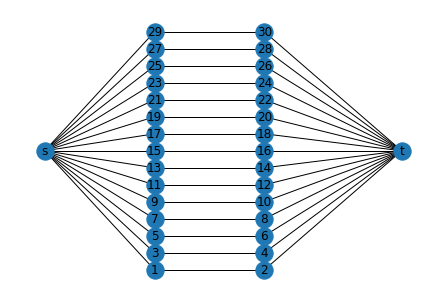

In [ ]:
pos = {} # Dictionary mapping nodes to their position
for n in G.nodes:
    # We want to have at most 15 nodes per column, thus the middle is 8
    if n == "s":
        pos[n] = (1,8)
    elif n == "t":
        pos[n] = (14,8)
    elif n % 2 == 1:
        pos[n] = (5, n//2 + 1)
    elif n % 2 == 0:
        pos[n] = (9, n//2)

nx.set_node_attributes(G, pos, "pos")

nx.draw(G, nx.get_node_attributes(G,'pos'), with_labels=True)

However, we do not need to add the positions as attributes to the graph to draw it. Look at the directed graph example below to see how it works. The benefit of adding the position as node attributes is that you only have to pass around the Graph in your code instead of always passing the Graph and the position dictionary (the same is also true for all other data that could be set as node or edge attributes).  
We also use a different function here, namely [draw_networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html), that allows more configuration.
Also, we use a `matplotlib` figure in order to specify the size.

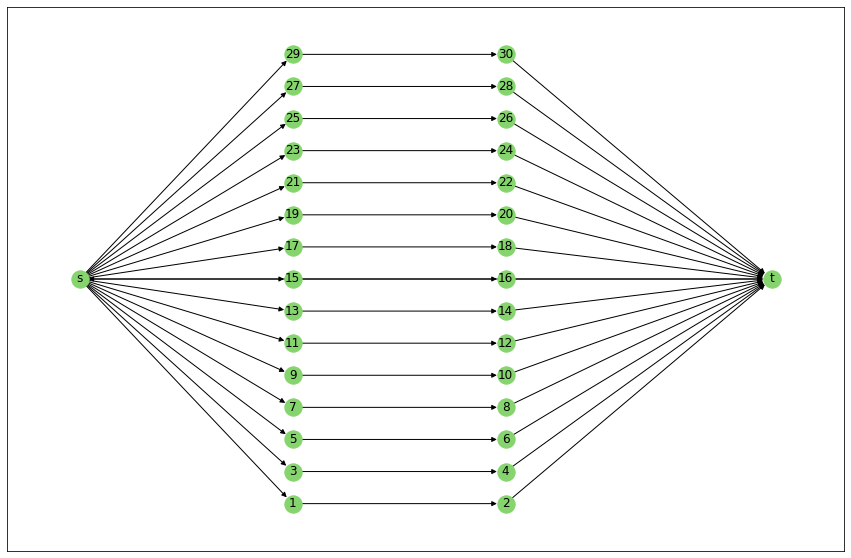

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
nx.draw_networkx(D, pos, ax=ax, with_labels=True, node_color="#86d46e")

Some other useful functions are:

[in_edges](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_edges.html#networkx.DiGraph.in_edges) returns all incoming edges for a node in a directed graph.

[out_edges](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_edges.html#networkx.DiGraph.out_edges) returns all outgoing edges for a node in a directed graph.

[neighbors](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.neighbors.html#networkx.classes.function.neighbors) returns all neighbors of a node in a (un)directed graph.

[subgraph](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.subgraph.html#networkx.classes.function.subgraph) returns a subgraph with the given nodes.

Edges into the node t in D: [(2, 't'), (4, 't'), (6, 't'), (8, 't'), (10, 't'), (12, 't'), (14, 't'), (16, 't'), (18, 't'), (20, 't'), (22, 't'), (24, 't'), (26, 't'), (28, 't'), (30, 't')]
Edges out of node 13 in D: [(13, 14)]
Neighbors of node 7 in G: ['s', 8]


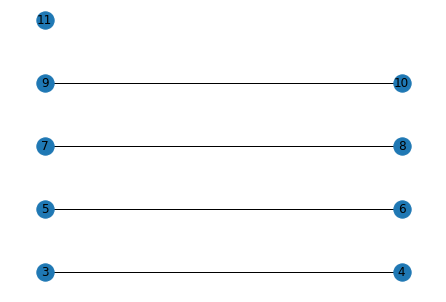

In [ ]:
print("Edges into the node t in D:", D.in_edges("t"))
print("Edges out of node 13 in D:", D.out_edges(13))
print("Neighbors of node 7 in G:", list(G.neighbors(7)))

subset_of_nodes = list(range(3,12))
subgraph = G.subgraph(subset_of_nodes)
nx.draw(subgraph, pos, with_labels=True)

## Networkx and Gurobi models

We are interested in using the networkx library to build gurobi models.

Consider the stable set problem. For a given undirected graph $G = (V,E)$, a stable set is a subset of vertices $S \subseteq V$ such that for all $i, j \in S , \{i, j\} \not\in E$, that is, no two vertices in $S$ are connected by an edge of the graph. The (maximum cardinality) stable set problem consists in finding a stable set $S$ of maximum size $|S|$.
This can be modeled with Gurobi:

In [ ]:
from gurobipy import *

def solve(G):
    model = Model("MC Stable Set")
    model.modelSense = GRB.MAXIMIZE

    # Variable for each node: Is it in the stable set or not?
    x = {}
    for v in G.nodes:
        x[v] = model.addVar(name=f"x_{v}", vtype="b", obj=1)

    model.update()

    # Constraint: For nodes that are linked by edges, only one of them can be in the set
    for (i,j) in G.edges:
        model.addConstr(x[i] + x[j] <= 1)

    model.optimize()

    # Obtain a list of vertices that are in the solution
    stable_set = []
    if model.status == GRB.OPTIMAL:
        for v in G.nodes:
            if round(x[v].x) == 1:
                stable_set.append(v)

    return stable_set



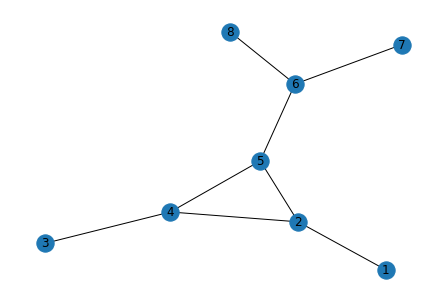

In [ ]:
edges = [(1,2), (2,4), (2,5), (4,5), (3,4), (5,6), (6,7), (6,8)]
G = nx.Graph()
G.add_edges_from(edges)

nx.draw(G, with_labels=True)

In [ ]:
stable_set = solve(G)
print("The nodes in the stable set are", stable_set)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 8 rows, 8 columns and 16 nonzeros
Model fingerprint: 0x7db051a0
Variable types: 0 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 8 rows and 8 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 5 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+00, best bound 5.000000000000e+00, gap 0.0000%
The nodes in the stable set are [1, 5, 3, 7, 8]


We can visualize the solution using networkx:

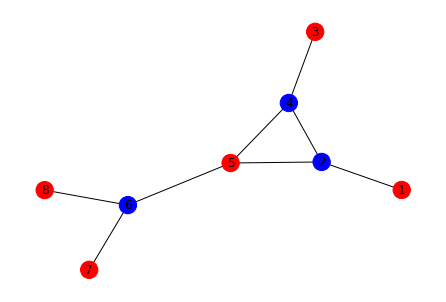

In [ ]:
color_map = ["blue" if v not in stable_set else "red" for v in G.nodes]

nx.draw(G, node_color=color_map, with_labels=True)